In [12]:
# Load Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the Dataset
# Replace 'path_to_your_file.csv' with your file's actual path
data = pd.read_csv("D:/Data Analytics certificates/Case Study Files/CaseStudy03/Python/bestsellers with categories.csv")

# Display the first few rows of the dataset to confirm it Loaded correctly
print(data.head())

                                                Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  


In [3]:
# Step 2: Inspect the Data
# Check structure and summary of the dataset

# Print structure of the dataset
print(data.info())

# Print summary statistics of the dataset
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB
None
       User Rating       Reviews       Price         Year
count   550.000000    550.000000  550.000000   550.000000
mean      4.618364  11953.281818   13.100000  2014.000000
std       0.226980  11731.132017   10.842262     3.165156
min       3.300000     37.000000    0.000000  2009.000000
25%       4.500000   4058.000000    7.000000  2011.000000
50%       4.700000   8580.000000   11.000000  2014.000000
75%       4.800000  17253.250000   16.000000

In [4]:
# Step 3: Data Cleaning

# 1. Check for missing values
missing_values_count = data.isna().sum().sum() # Total number of miissing values
print(f"Total missing values: {missing_values_count}")

# 2. Check for duplicates
duplicates = data[data.duplicated()]
print("Duplicates:")
print(duplicates)

# Remove duplicates if any
data = data.drop_duplicates()


Total missing values: 0
Duplicates:
Empty DataFrame
Columns: [Name, Author, User Rating, Reviews, Price, Year, Genre]
Index: []


In [5]:
# Step 4: Data Transformation
# Convert column names to Lowercase for consistency
data.columns = data.columns.str.lower()

# Display the first few rows of the DataFrame
print(data.head())

                                                name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     author  user rating  reviews  price  year        genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  


In [10]:
# Step 5: Data Analysis
# 1. Genre Distribution
genre_distribution = data.groupby('genre').size().reset_index(name='count')

# 2. Top Authors by Number of Books
top_authors = (
    data.groupby('author')
    .size()
    .reset_index(name='book_count')
    .sort_values(by='book_count', ascending=False)
    .head(10)
)

# 3. Average User Rating by Genre with a fixed value of 4.618
avg_rating = data['genre'].drop_duplicates().to_frame()
avg_rating['avg_rating'] = 4.618

# 4. Price Analysis by Genre
price_genre = data.groupby('genre').agg(
    avg_price = ('price', 'mean'),
    median_price = ('price', 'median')
).reset_index()

# 5. Yearly Trends in Bestsellers
yearly_trends = data.groupby(['year', 'genre']).size().reset_index(name='count')


C:\Users\Jayoda Kulatunga\AppData\Local\Temp\ipykernel_11696\3796334219.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_distribution, x='genre', y='count', palette='viridis')


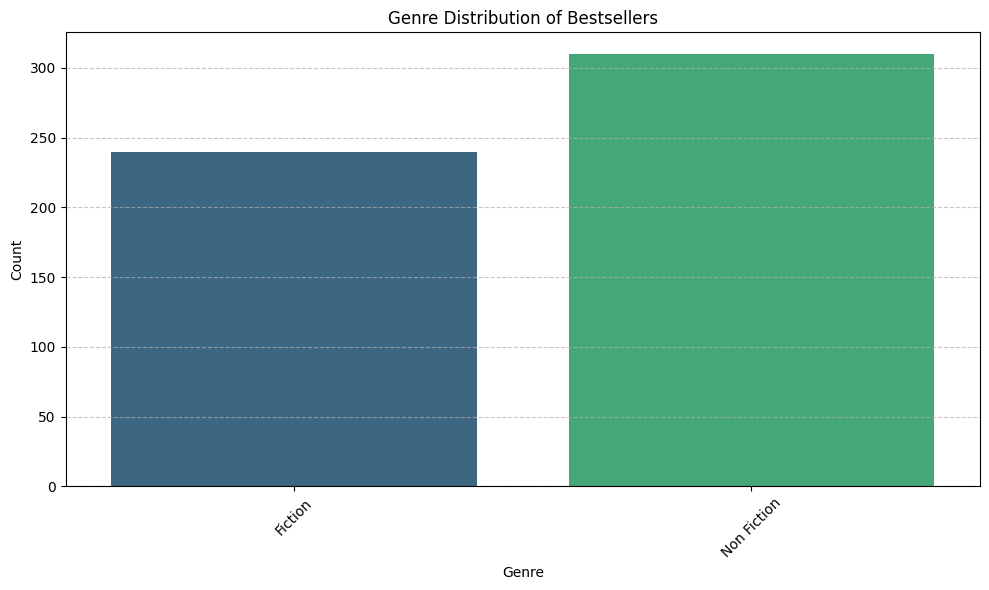

In [13]:
# Visualization: Genre Distribution
plt.figure(figsize=(10,6))
sns.barplot(data=genre_distribution, x='genre', y='count', palette='viridis')
plt.title("Genre Distribution of Bestsellers")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\Jayoda Kulatunga\AppData\Local\Temp\ipykernel_11696\968056142.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


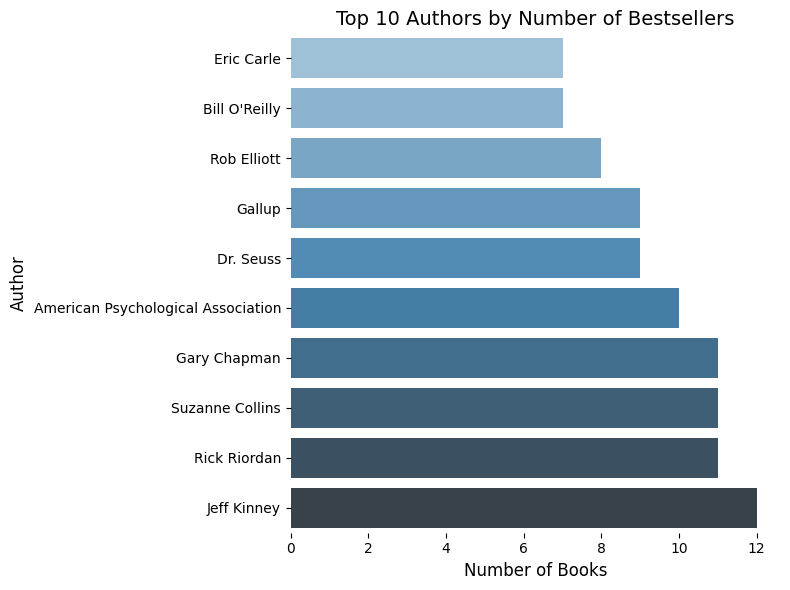

In [15]:
# Visualization: Top 10 Authors by Number of Books
# Sort authors by book count in ascenting order
top_authors = top_authors.sort_values(by='book_count', ascending=True)

# Create the plot
plt.figure(figsize=(8, 6))
sns.barplot(
    x='book_count',
    y='author',
    data=top_authors,
    palette='Blues_d',
    orient='h'
)

# Add titles and Labels
plt.title("Top 10 Authors by Number of Bestsellers", fontsize=14)
plt.xlabel("Number of Books", fontsize=12)
plt.ylabel("Author", fontsize=12)

# Apply a minimal theme
sns.despine(left=True, bottom=True)

#Show the plot
plt.tight_layout()
plt.show()

C:\Users\Jayoda Kulatunga\AppData\Local\Temp\ipykernel_11696\4283712655.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(


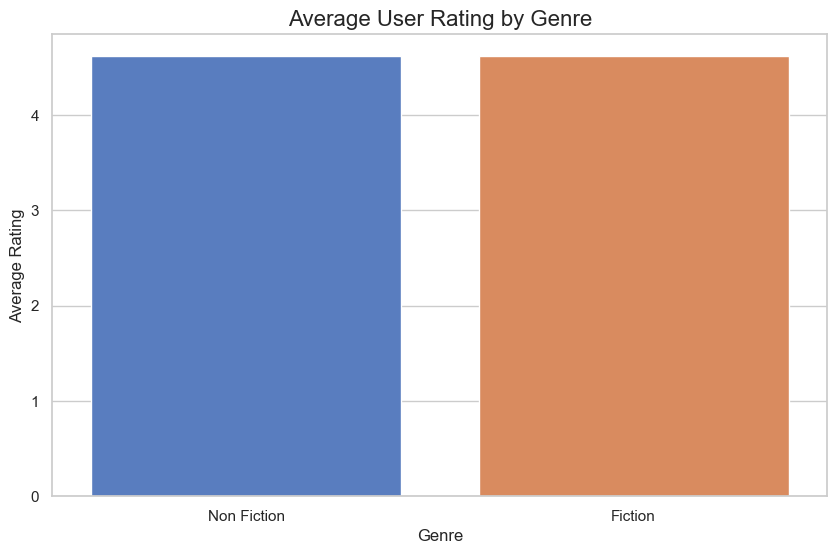

In [16]:
# Visualization: Average User Rating by Genre
# Set the style of the plot
sns.set_theme(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(
    x = "genre",
    y = "avg_rating",
    data=avg_rating,
    palette="muted"
)

# Add Labels and title
bar_plot.set_title("Average User Rating by Genre", fontsize=16)
bar_plot.set_xlabel("Genre", fontsize=12)
bar_plot.set_ylabel("Average Rating", fontsize=12)

# Show the plot
plt.show()


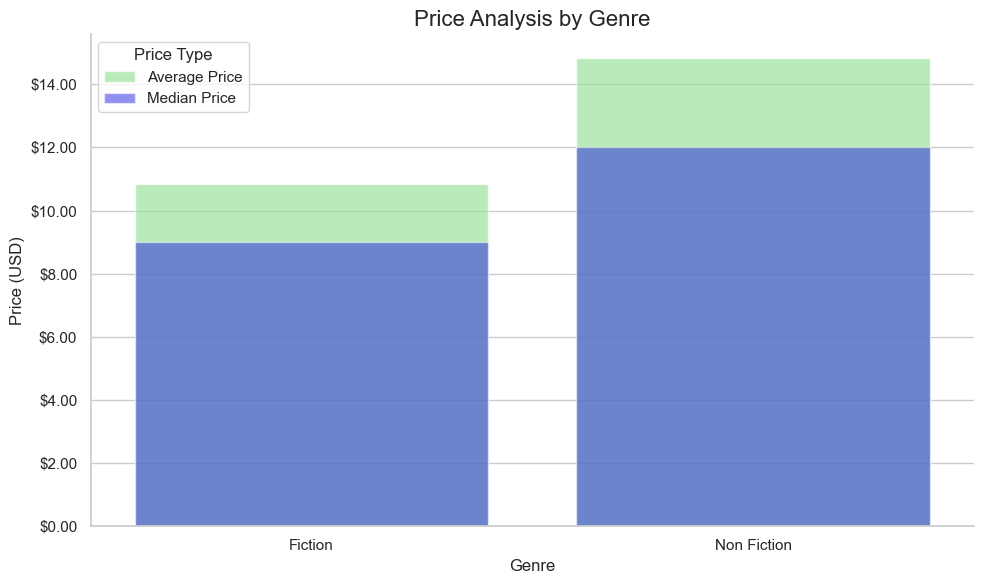

In [20]:
# Visualization: Price Analysis by Genre
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plot average price bars
sns.barplot(
    x='genre',
    y='avg_price',
    data=price_genre,
    color='lightgreen',
    alpha=0.7,
    label='Average Price',
    ax=ax
)

# Plot median price bars
sns.barplot(
    x='genre',
    y='median_price',
    data=price_genre,
    color='blue',
    alpha=0.5,
    label='Median Price',
    ax=ax
)

# Adding Labels and title
ax.set_title('Price Analysis by Genre', fontsize=16)
ax.set_xlabel('Genre', fontsize=12)
ax.set_ylabel('Price (USD)', fontsize=12)

# Formatting y-axis as dollar
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x:,.2f}'))

# Adding Legend
ax.legend(title='Price Type')

# Apply minimal theme
sns.despine()

# Show plot
plt.tight_layout()
plt.show()

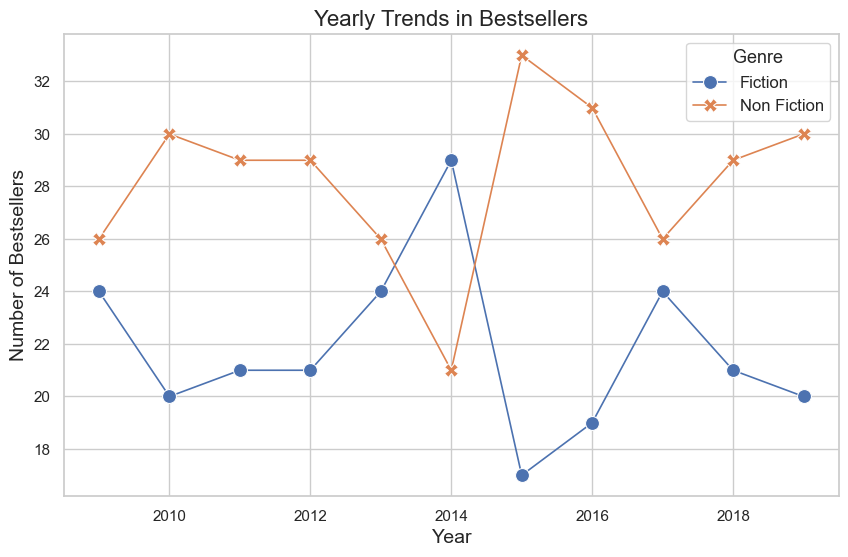

In [21]:
# Visualization: Yearly Trends in Bestsellers
# Set Seaborn theme
sns.set_theme(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=yearly_trends,
    x='year',
    y='count',
    hue='genre',
    style='genre',
    markers=True,
    dashes=False,
    linewidth=1.2,
    markersize=10
)

# Add Labels and title
plt.title("Yearly Trends in Bestsellers", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Bestsellers", fontsize=14)

# Customize Legend
plt.legend(title='Genre', fontsize=12, title_fontsize=13)

# Show the plot
plt.show()

In [22]:
# Step 7: Save Cleaned Data
# Save the cleaned data for future use
data.to_csv("cleaned_bestsellers.csv", index=False)

In [ ]:
## Name,Author,User Rating,Reviews,Price,Year,Genre
## 10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
## 11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
## 12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
## 1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
## "5,000 Awesome Facts (About Everything!) (National Geographic Kids)",National Geographic Kids,4.8,7665,12,2019,Non Fiction
## A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction
## A Game of Thrones / A Clash of Kings / A Storm of Swords / A Feast of Crows / A Dance with Dragons,George R. R. Martin,4.7,19735,30,2014,Fiction
## A Gentleman in Moscow: A Novel,Amor Towles,4.7,19699,15,2017,Fiction
## "A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3,2018,Non Fiction
## A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2016,Fiction
## A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2017,Fiction
## A Patriot's History of the United States: From Columbus's Great Discovery to the War on Terror,Larry Schweikart,4.6,460,2,2010,Non Fiction
## A Stolen Life: A Memoir,Jaycee Dugard,4.6,4149,32,2011,Non Fiction
## A Wrinkle in Time (Time Quintet),Madeleine L'Engle,4.5,5153,5,2018,Fiction
## "Act Like a Lady, Think Like a Man: What Men Really Think About Love, Relationships, Intimacy, and Commitment",Steve Harvey,4.6,5013,17,2009,Non Fiction
## "Adult Coloring Book Designs: Stress Relief Coloring Book: Garden Designs, Mandalas, Animals, and Paisley Patterns",Adult Coloring Book Designs,4.5,2313,4,2016,Non Fiction
## Adult Coloring Book: Stress Relieving Animal Designs,Blue Star Coloring,4.6,2925,6,2015,Non Fiction
## Adult Coloring Book: Stress Relieving Patterns,Blue Star Coloring,4.4,2951,6,2015,Non Fiction
## "Adult Coloring Books: A Coloring Book for Adults Featuring Mandalas and Henna Inspired Flowers, Animals, and Paisley…",Coloring Books for Adults,4.5,2426,8,2015,Non Fiction
